In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pandas.tseries.offsets import DateOffset

C:\Users\TANU SHREE\AppData\Local\Temp\ipykernel_4748\633473983.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('../combined.csv')

df.columns=["Date", "QTY"]


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [5]:
print(df)
print(df.describe())

                QTY
Date               
2018-01-01   257733
2018-01-04   577207
2018-01-05  1322201
2018-01-06  1652038
2018-01-07  1548883
...             ...
2022-12-27  1029546
2022-12-28   971387
2022-12-29   231274
2022-12-30   358590
2022-12-31  1020553

[1338 rows x 1 columns]
                QTY
count  1.338000e+03
mean   8.970247e+05
std    6.785115e+05
min    3.010000e+03
25%    3.186935e+05
50%    7.902890e+05
75%    1.346228e+06
max    4.459799e+06


<Axes: xlabel='Date'>

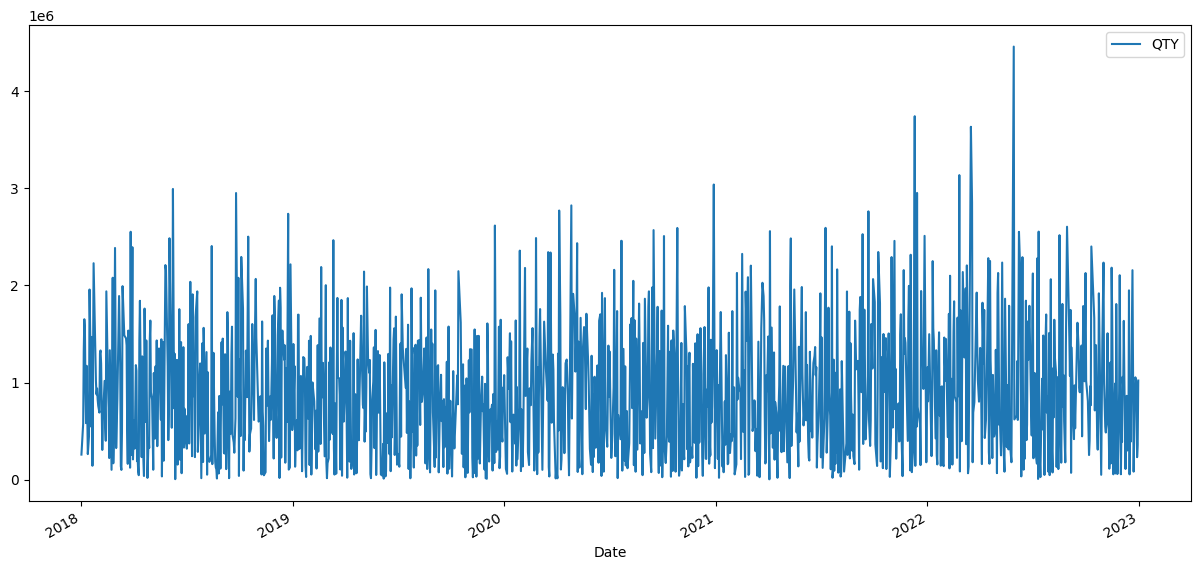

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
test_result=adfuller(df['QTY'])

In [9]:
def adfuller_test(qty):
    result=adfuller(qty)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['QTY'])

ADF Test Statistic : -8.57037308716011
p-value : 8.228727147964481e-14
#Lags Used : 11
Number of Observations : 1326
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [10]:
df['First Difference'] = df['QTY'] - df['QTY'].shift(1)
df['Seasonal First Difference']=df['QTY']-df['QTY'].shift(12)
df.head()

,QTY,First Difference,Seasonal First Difference
Date,,,
2018-01-01,257733,NaN,NaN
2018-01-04,577207,319474.0,NaN
2018-01-05,1322201,744994.0,NaN
2018-01-06,1652038,329837.0,NaN
2018-01-07,1548883,-103155.0,NaN


<Axes: xlabel='Date'>

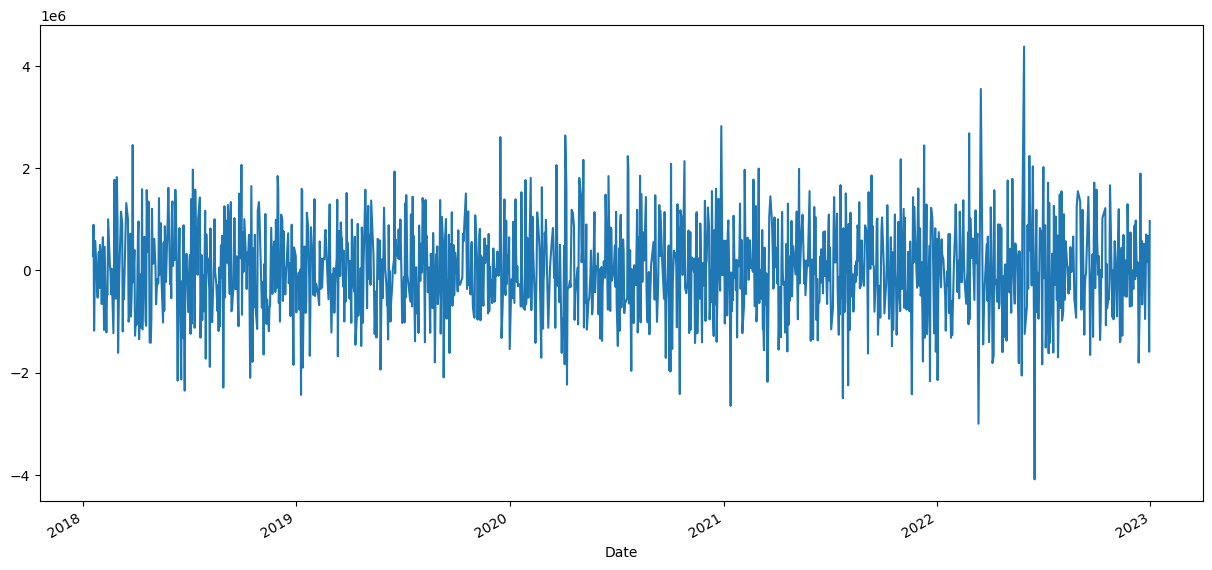

In [11]:
df['Seasonal First Difference'].plot()

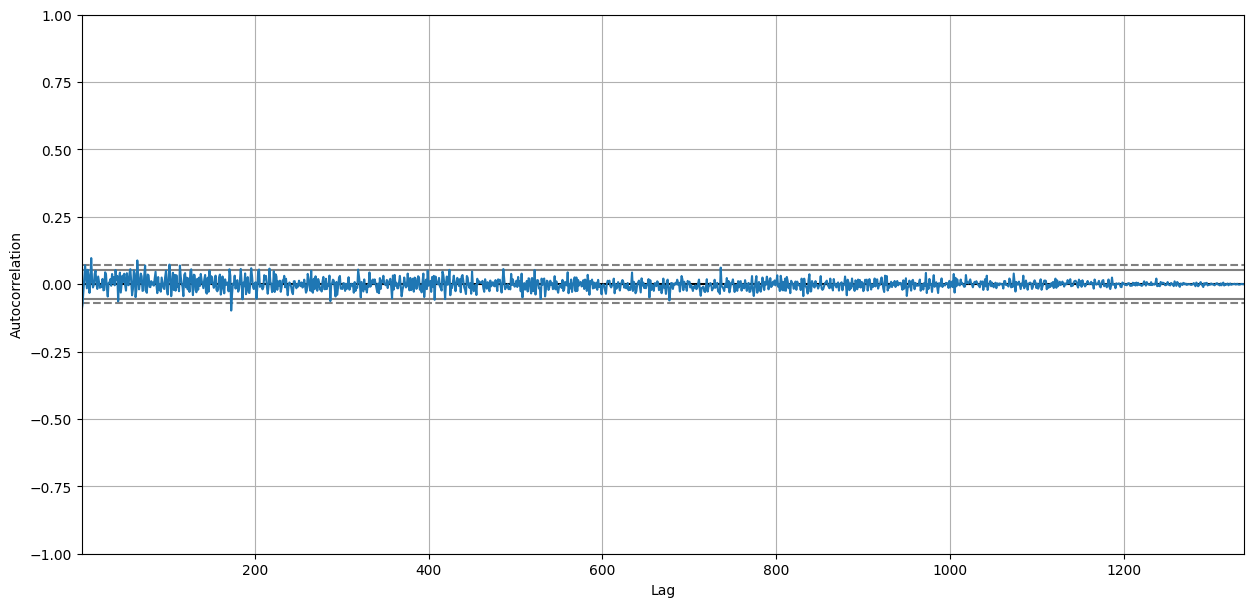

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['QTY'])
plt.show()

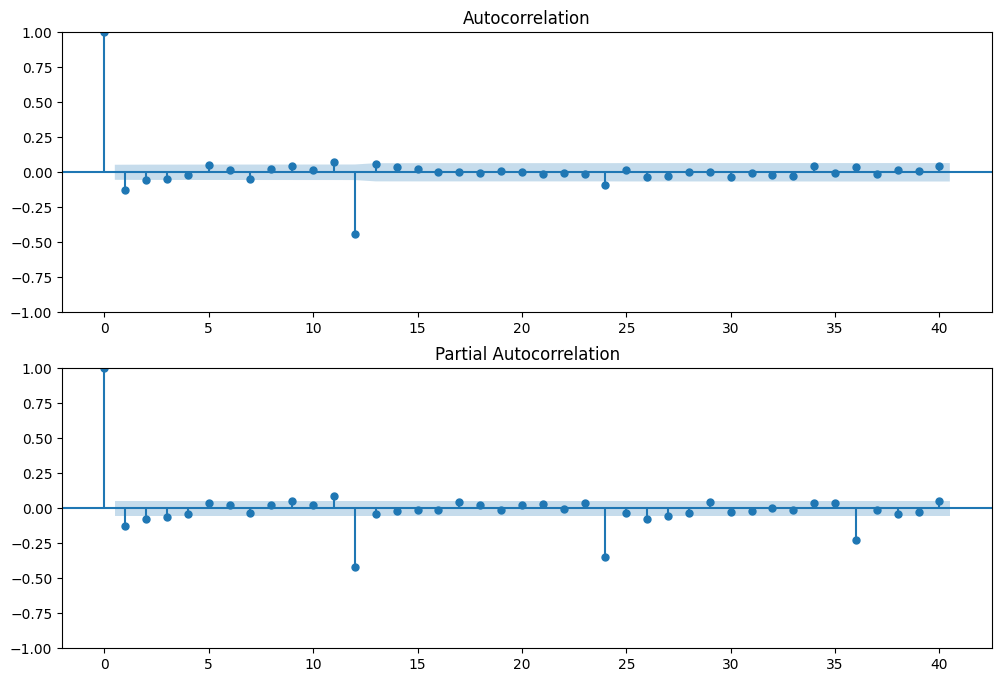

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['QTY'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    QTY   No. Observations:                 1338
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -19863.021
Date:                Fri, 08 Mar 2024   AIC                          39732.043
Time:                        22:53:55   BIC                          39747.637
Sample:                             0   HQIC                         39737.886
                               - 1338                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1100      0.035     -3.135      0.002      -0.179      -0.041
ma.L1         -0.9902      0.005   -189.225      0.000      -1.000      -0.980
sigma2      5.845e+11   8.36e-16   6.99e+26      0.000    5.85e+11    5.85e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):               142.70
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.77
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.91e+42. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

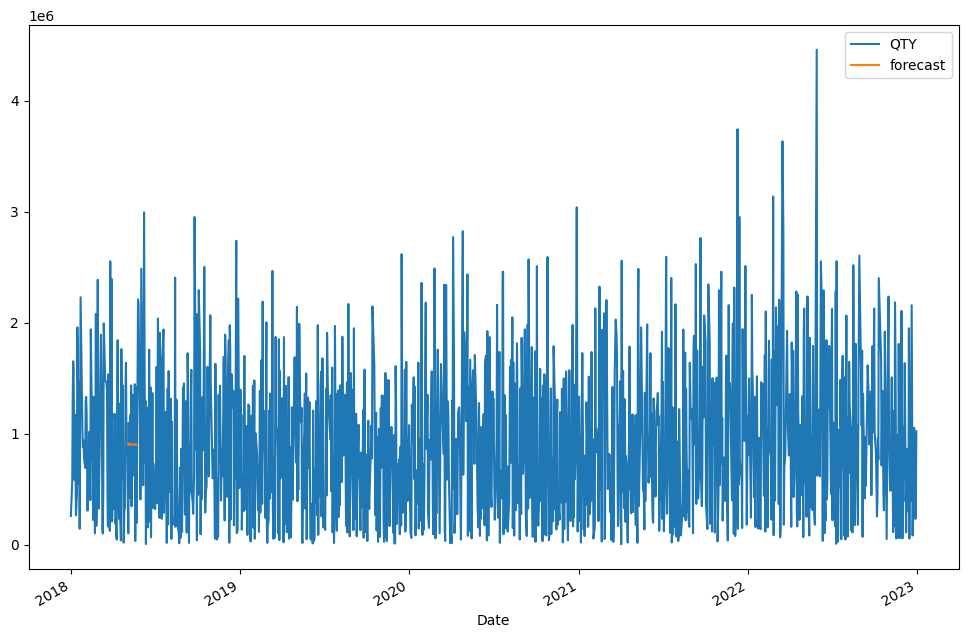

In [15]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['QTY','forecast']].plot(figsize=(12,8))

c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\TANU SHREE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

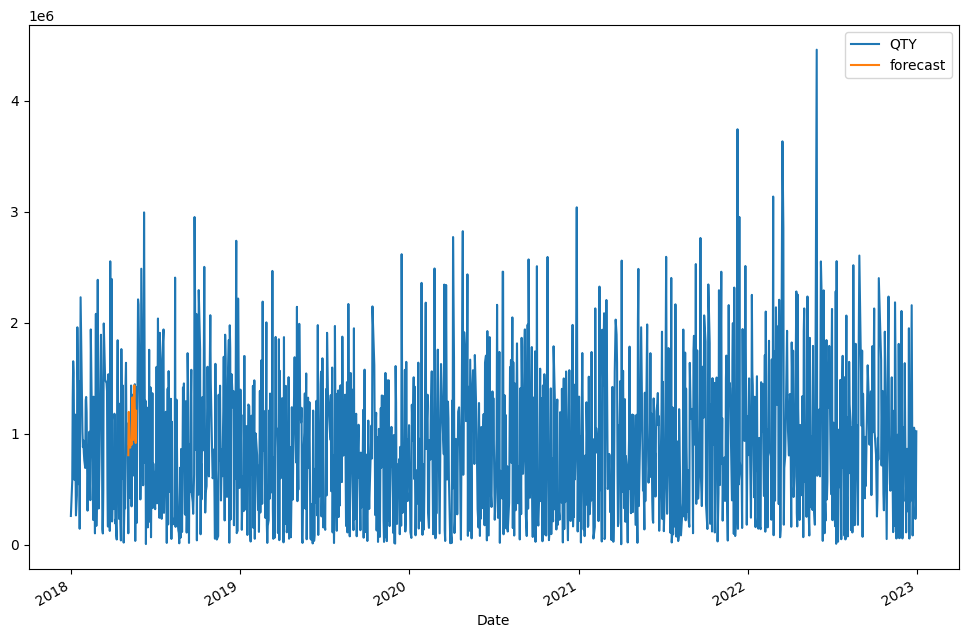

In [16]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['QTY'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['QTY','forecast']].plot(figsize=(12,8))

C:\Users\TANU SHREE\AppData\Local\Temp\ipykernel_4748\1797947973.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

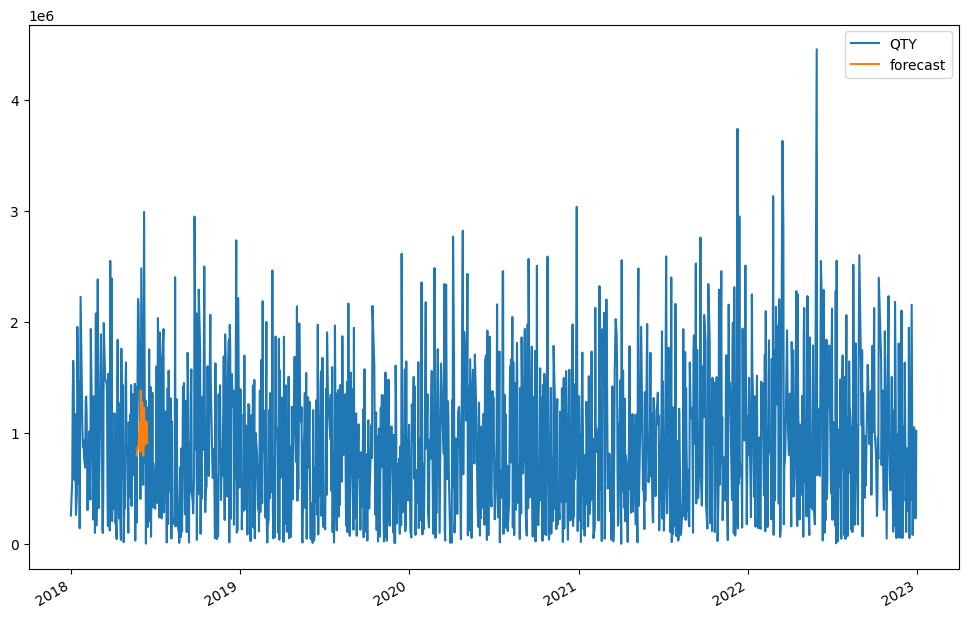

In [17]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['QTY', 'forecast']].plot(figsize=(12, 8))